## Покращення ефективності та часу виконання програми "Прибульці та IQ" за допомогою GEMINI AI

Перша функція: читання з файлу та запис у словник

![Screenshot 2024-04-19 at 11.37.50.png](<attachment:Screenshot 2024-04-19 at 11.37.50.png>)
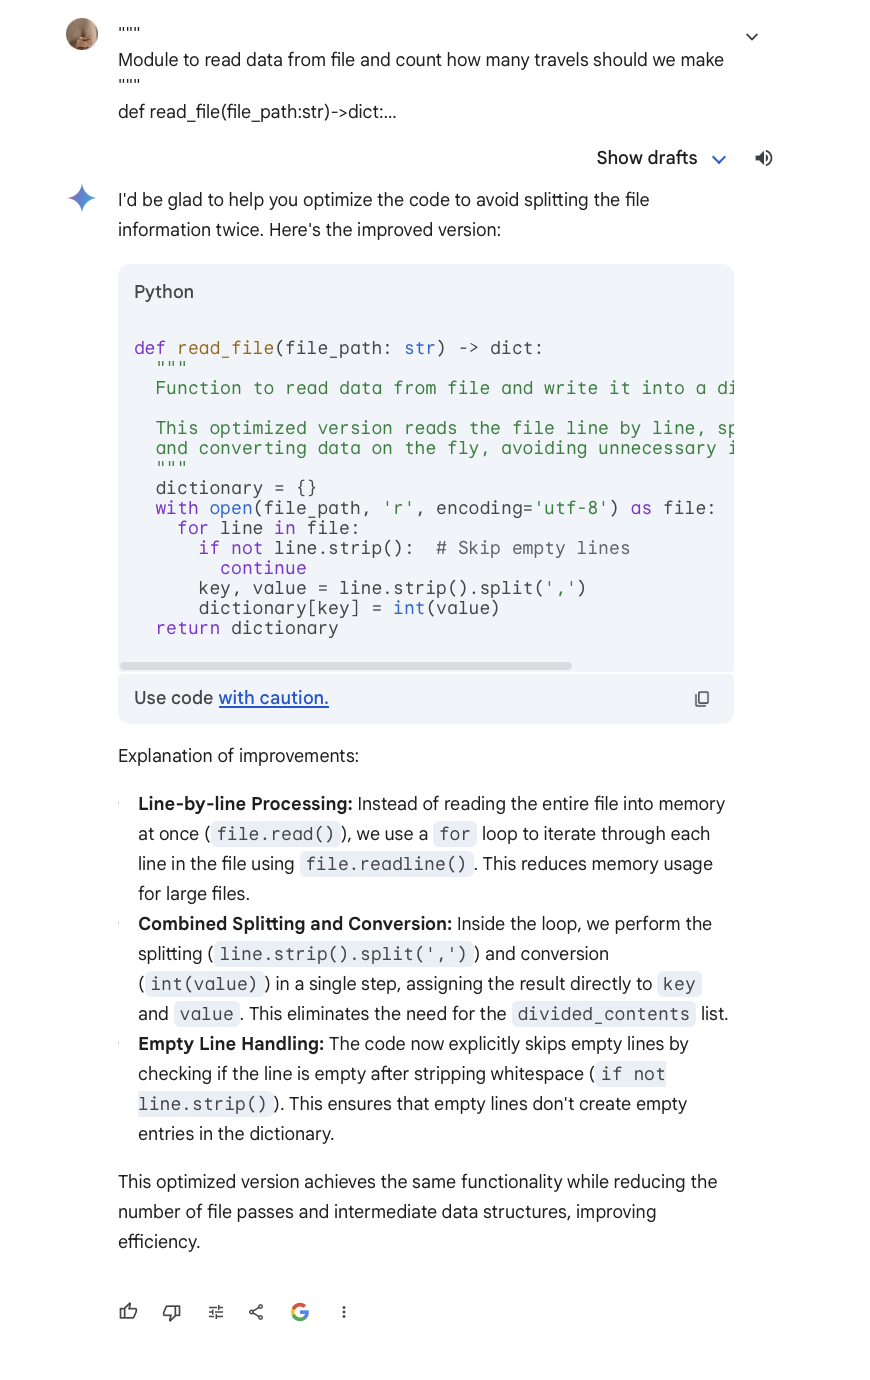

In [ ]:
def read_file(file_path: str) -> dict:
    """
    Function to read data from file and write it into a dictionary.

    This optimized version reads the file line by line, splitting
    and converting data on the fly, avoiding unnecessary intermediate lists.
    >>> import tempfile
    >>> with tempfile.NamedTemporaryFile(mode = 'w', \
delete = False, encoding = 'utf-8') as tmpfile:
    ...     _ = tmpfile.write("Elon Musk,165\\nMark \
Zuckerberg,152\\nWill Smith,157\\nMarilyn vos Savant,186\\nJudith \
Polgar,170\\nQuentin Tarantino,163\\nBill Gates,160\\nConan \
O'Brien,160\\nEmma Watson,132\\nBarack Obama,137")
    >>> read_file(tmpfile.name)
    {'Elon Musk': 165, 'Mark Zuckerberg': 152, 'Will \
Smith': 157, 'Marilyn vos Savant': 186, 'Judith Polgar': 170, 'Quentin \
Tarantino': 163, 'Bill Gates': 160, "Conan O'Brien": 160, 'Emma \
Watson': 132, 'Barack Obama': 137}
    """
    dictionary = {}
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            if not line.strip():
                continue
            key, value = line.strip().split(',')
            dictionary[key] = int(value)
    return dictionary

Друга функція: сортування людей за подорожами.

Я вирішила одразу давати йому вказівки з підказками. Але з першого разу це не допомогло

![Screenshot 2024-04-19 at 13.45.24.png](<attachment:Screenshot 2024-04-19 at 13.45.24.png>)
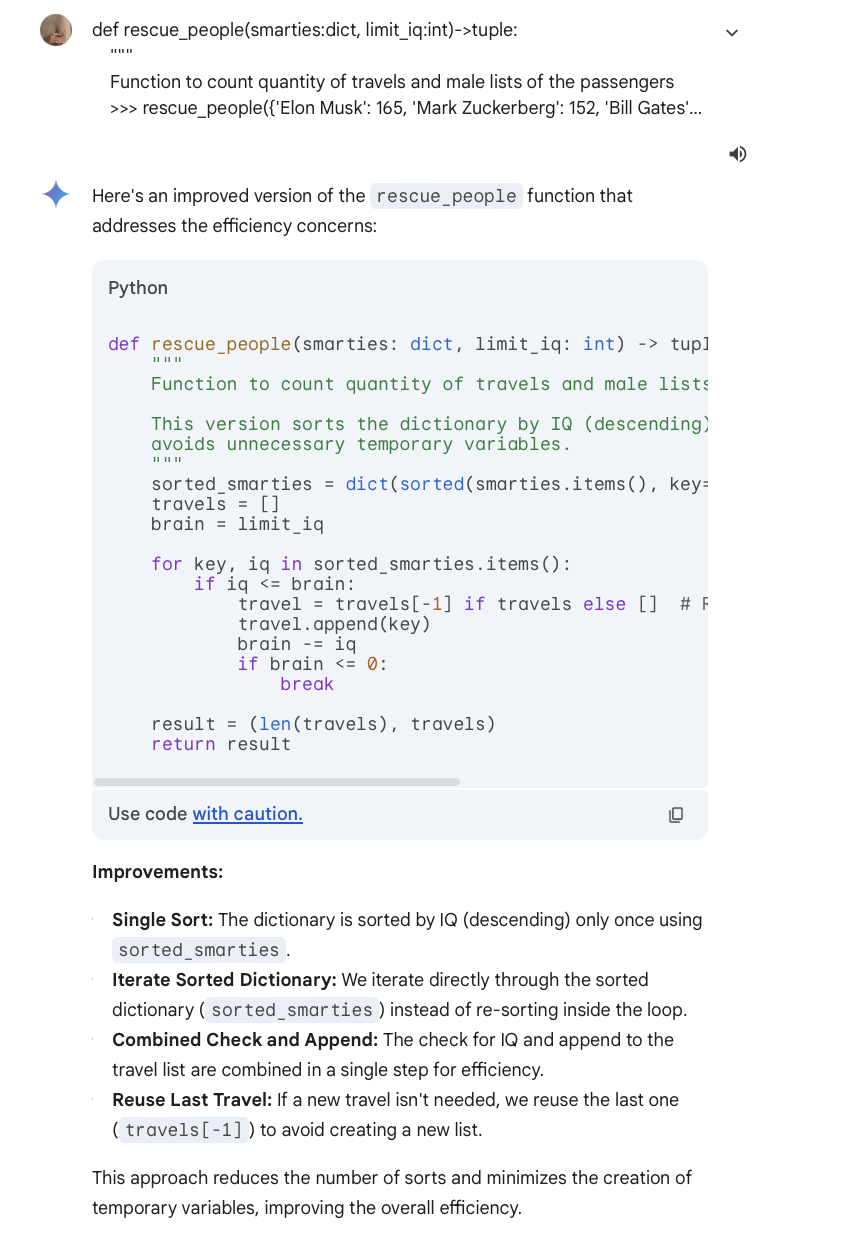

![Screenshot 2024-04-19 at 13.45.44.png](<attachment:Screenshot 2024-04-19 at 13.45.44.png>)
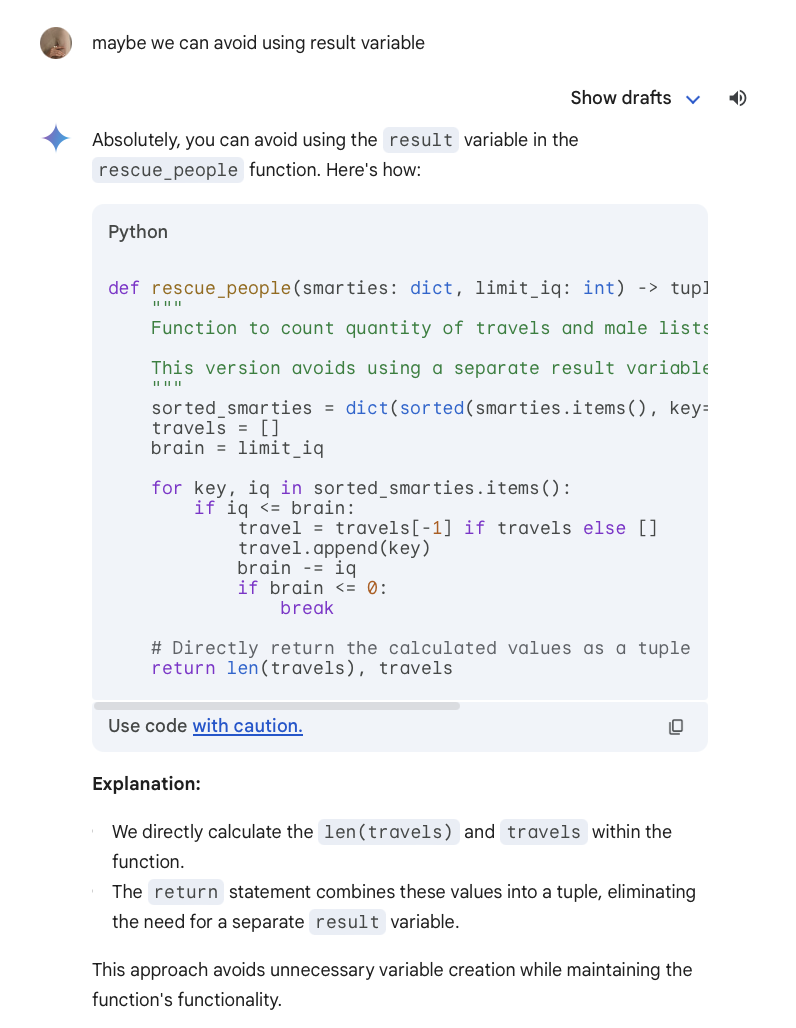

In [ ]:
def rescue_people(smarties: dict, limit_iq: int) -> tuple:
    """
    Function to count quantity of travels and male lists of the passengers.

    This version avoids using a separate result variable.
    """
    sorted_smarties = dict(sorted(smarties.items(), key=lambda item: item[1], reverse=True))
    travels = []
    brain = limit_iq

    for key, iq in sorted_smarties.items():
        if iq <= brain:
            travel = travels[-1] if travels else []
            travel.append(key)
            brain -= iq
            if brain <= 0:
                break

    # Directly return the calculated values as a tuple
    return len(travels), travels

Код не пройшов навіть мій доктест :/

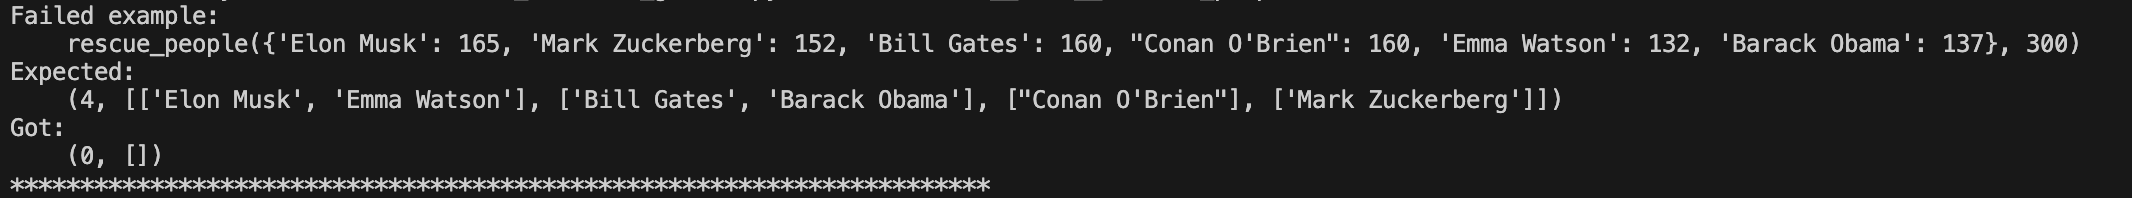

Після ще одного запиту, він надіслав мені ось такий код.

![Screenshot 2024-04-20 at 14.08.56.png](<attachment:Screenshot 2024-04-20 at 14.08.56.png>)
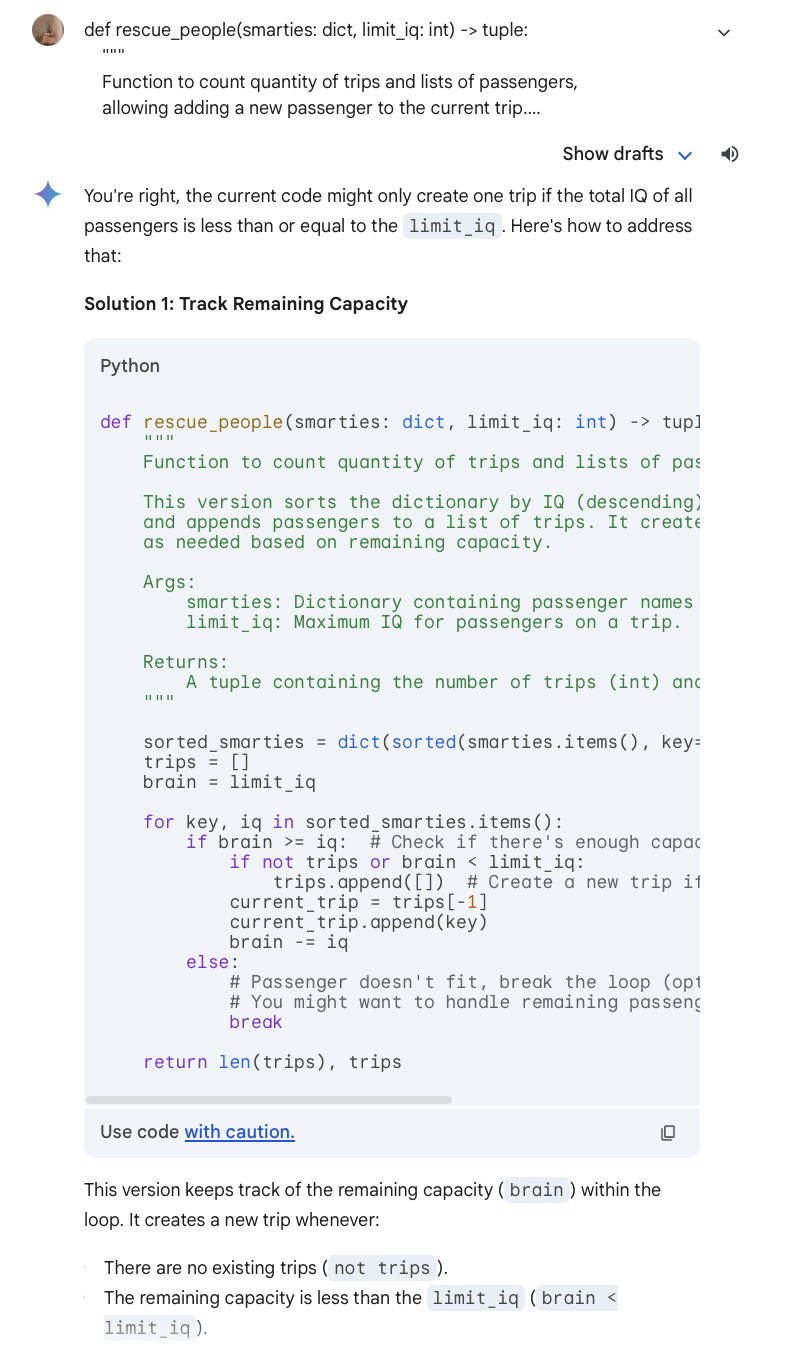

Він теж не проходив, тому я трохи підправила, щоб проходило хоч базовий кейс.

In [ ]:
""" Rescue module """

def read_file(file_path: str) -> dict:
    """
    Function to read data from file and write it into dict
    >>> import tempfile
    >>> with tempfile.NamedTemporaryFile(mode = 'w', \
delete = False, encoding = 'utf-8') as tmpfile:
    ...     _ = tmpfile.write("Elon Musk,165\\nMark \
Zuckerberg,152\\nWill Smith,157\\nMarilyn vos Savant,186\\nJudith \
Polgar,170\\nQuentin Tarantino,163\\nBill Gates,160\\nConan \
O'Brien,160\\nEmma Watson,132\\nBarack Obama,137")
    >>> read_file(tmpfile.name)
    {'Elon Musk': 165, 'Mark Zuckerberg': 152, 'Will \
Smith': 157, 'Marilyn vos Savant': 186, 'Judith Polgar': 170, 'Quentin \
Tarantino': 163, 'Bill Gates': 160, "Conan O'Brien": 160, 'Emma \
Watson': 132, 'Barack Obama': 137}
    """
    dictionary = {}
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            if not line.strip():
                continue
            key, value = line.strip().split(',')
            dictionary[key] = int(value)
    return dictionary


def rescue_people(smarties: dict, limit_iq: int) -> tuple:
    """
    Function to count quantity of trips and lists of passengers,
    allowing adding a new passenger to the current trip.

    This version sorts the dictionary by IQ (descending) only once
    and appends passengers to a list of trips. Passengers can be added
    to the current trip within the loop.
    >>> rescue_people({'Elon Musk': 165, 'Mark Zuckerberg': 152, 'Bill Gates': 160, \
"Conan O'Brien": 160, 'Emma Watson': 132, 'Barack Obama': 137}, 300)
    (4, [['Elon Musk', 'Emma Watson'], ['Bill Gates', 'Barack Obama'], ["Conan O'Brien"], \
['Mark Zuckerberg']])
    >>> rescue_people({}, 300)
    (0, [])
    """
    # Make a copy of the dictionary keys to iterate over
    sorted_smarties = dict(sorted(smarties.items(), key=lambda item: item[1], reverse=True))
    keys = list(sorted_smarties.keys())
    trips = []
    current_trip = []  # Initialize the current trip list
    brain = limit_iq

    while keys:  # Iterate until all passengers are assigned to trips
        for key in keys:
            iq = sorted_smarties[key]
            if iq <= brain:
                current_trip.append(key)  # Add passenger to the current trip
                brain -= iq
                keys.remove(key)  # Remove the key from the list of keys
        trips.append(current_trip)
        current_trip = []
        brain = 300

    if current_trip:  # Check if there are remaining passengers in the current trip
        trips.append(current_trip)  # Append the last trip to trips

    return len(trips), trips



if __name__ == '__main__':
    import doctest
    print(doctest.testmod())

Але код не пройшов майже ніякі тести, що читання з файлу, що формування подорожей.

![Screenshot 2024-04-20 at 14.14.34.png](<attachment:Screenshot 2024-04-20 at 14.14.34.png>)
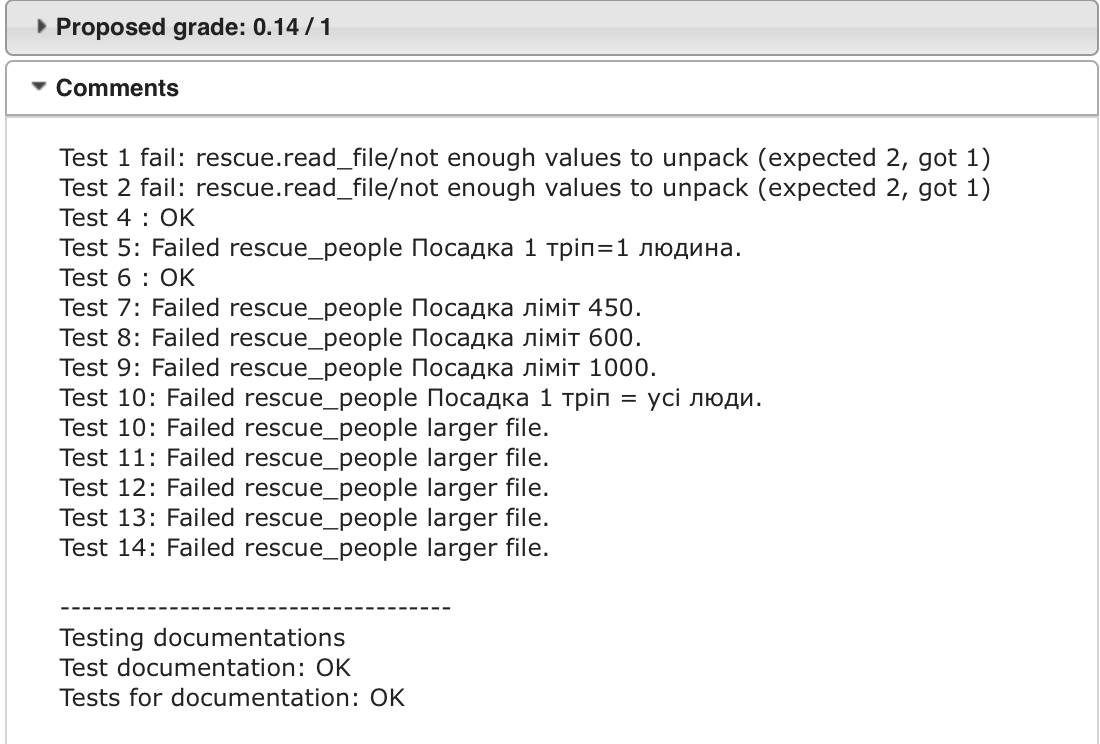

## Оформлення коду

![Screenshot 2024-04-20 at 15.34.53.png](<attachment:Screenshot 2024-04-20 at 15.34.53.png>)
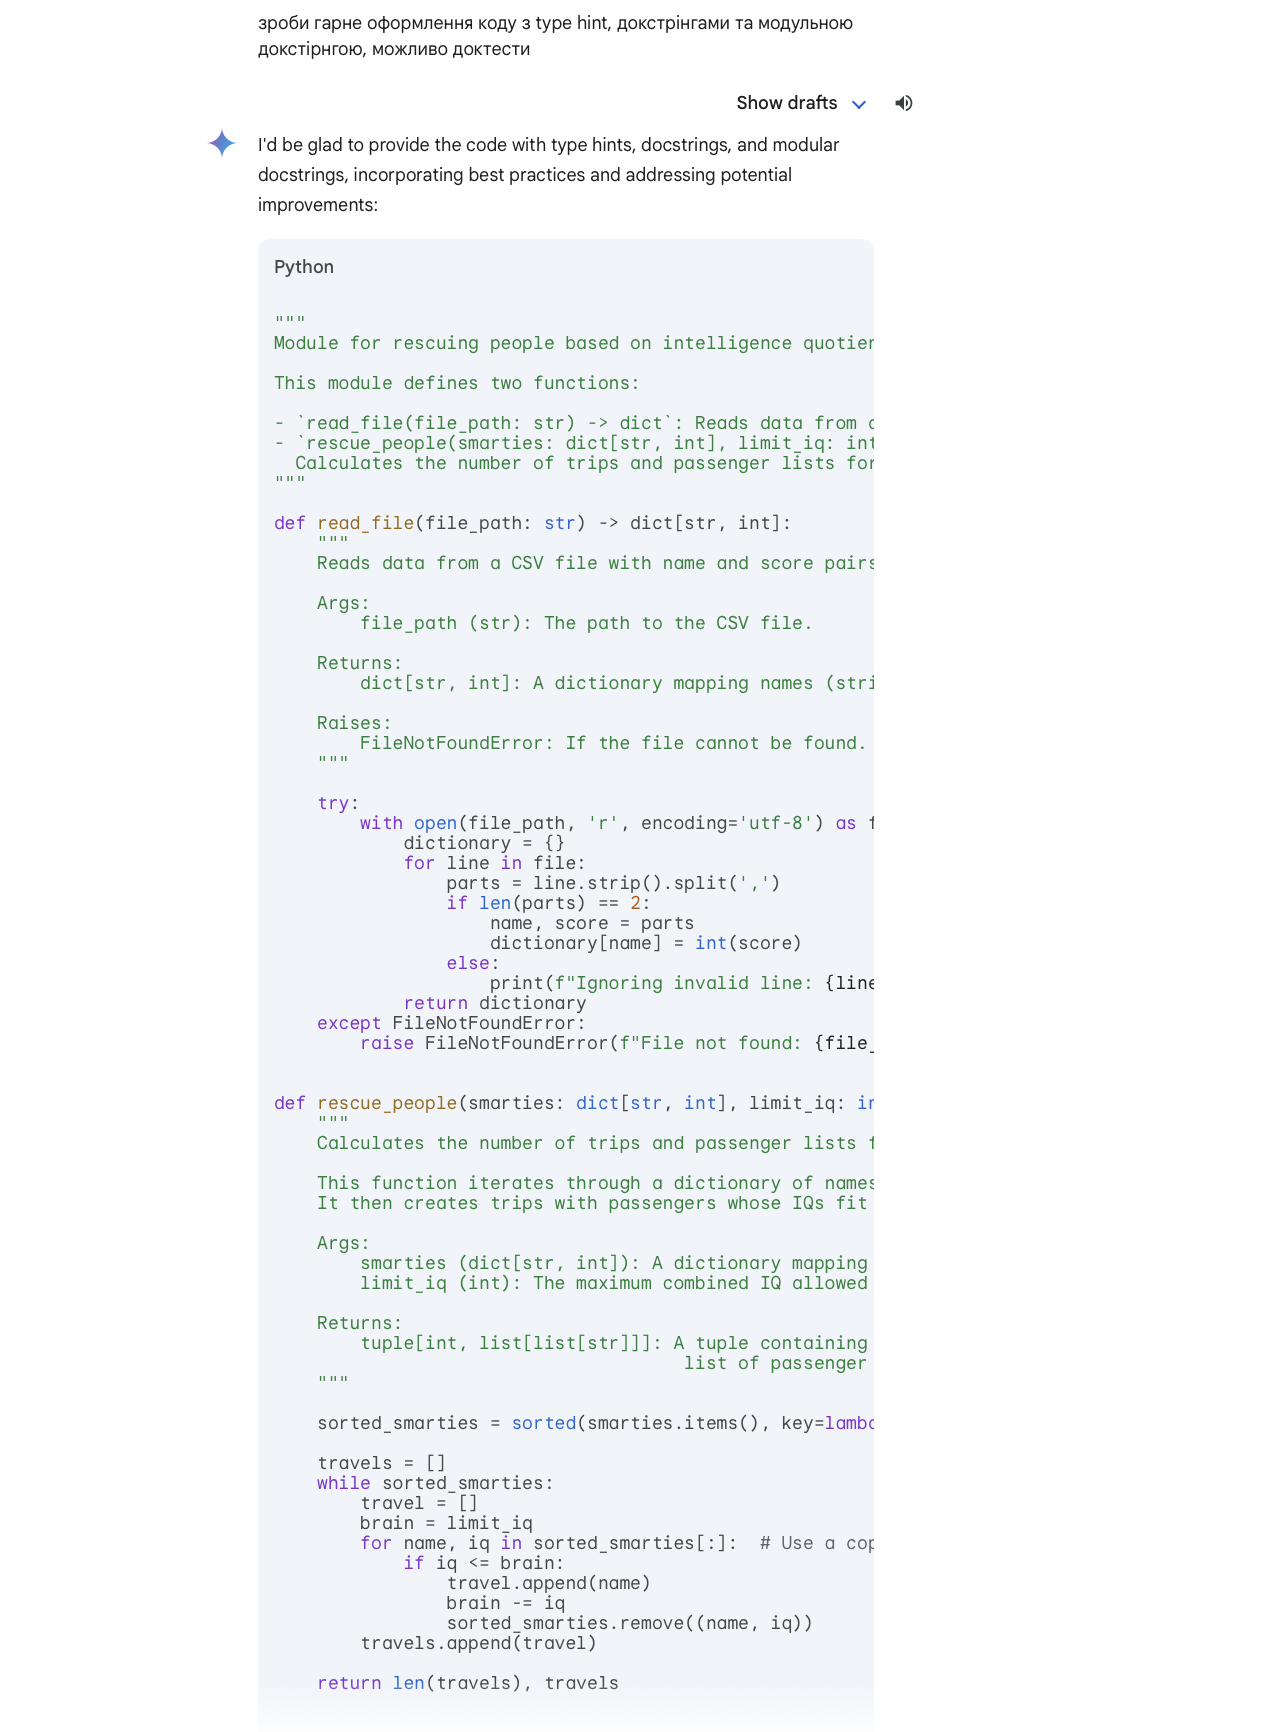

In [ ]:
"""
Module for rescuing people based on intelligence quotients (IQs) and a capacity limit.

This module defines two functions:

- `read_file(file_path: str) -> dict`: Reads data from a CSV file into a dictionary.
- `rescue_people(smarties: dict[str, int], limit_iq: int) -> tuple[int, list[list[str]]]:
  Calculates the number of trips and passenger lists for rescues, considering IQ constraints.
"""

def read_file(file_path: str) -> dict[str, int]:
    """
    Reads data from a CSV file with name and score pairs into a dictionary.

    Args:
        file_path (str): The path to the CSV file.

    Returns:
        dict[str, int]: A dictionary mapping names (strings) to their scores (integers).

    Raises:
        FileNotFoundError: If the file cannot be found.
    """

    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            dictionary = {}
            for line in file:
                parts = line.strip().split(',')
                if len(parts) == 2:
                    name, score = parts
                    dictionary[name] = int(score)
                else:
                    print(f"Ignoring invalid line: {line.strip()}")
            return dictionary
    except FileNotFoundError:
        raise FileNotFoundError(f"File not found: {file_path}")


def rescue_people(smarties: dict[str, int], limit_iq: int) -> tuple[int, list[list[str]]]:
    """
    Calculates the number of trips and passenger lists for rescues, considering IQ constraints.

    This function iterates through a dictionary of names and IQs, sorting by descending IQ.
    It then creates trips with passengers whose IQs fit within the given capacity limit.

    Args:
        smarties (dict[str, int]): A dictionary mapping names (strings) to their IQs (integers).
        limit_iq (int): The maximum combined IQ allowed for a single trip.

    Returns:
        tuple[int, list[list[str]]]: A tuple containing the number of trips (int) and a
                                      list of passenger lists (list of lists of strings).
    """

    sorted_smarties = sorted(smarties.items(), key=lambda x: (-x[1], x[0]))  # Sort by descending IQ, name

    travels = []
    while sorted_smarties:
        travel = []
        brain = limit_iq
        for name, iq in sorted_smarties[:]:  # Use a copy to avoid index issues
            if iq <= brain:
                travel.append(name)
                brain -= iq
                sorted_smarties.remove((name, iq))
        travels.append(travel)

    return len(travels), travels


if __name__ == '__main__':
    import doctest

    # Add doctests for the functions here (optional)
